#**CA06: Customer Segmentation using K-Means Clustering**



In [ ]:
#Importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
#Reading the data
customers = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv')

##**EDA**

In [ ]:
#Checking the first few rows of data
customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Data's variables 
customers.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
#Data's shape
print(customers.shape)
#There are 200 rows of data and 5 variables

(200, 5)


In [ ]:
#Data's data types
print(customers.dtypes)

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [ ]:
#CustomerID should be a categorical variable so I need to change the data type of that variable
customers['CustomerID'] = customers['CustomerID'].astype('object')

In [ ]:
#Chcecking Data's data types
print(customers.dtypes)

CustomerID                object
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [ ]:
#Calculating number of numerical variables
int_cols = customers.select_dtypes(include=['int64','float64'])

int_cols_count = int_cols.shape[1]

print(int_cols_count)

3


In [ ]:
#Calculating number of categorical variables
cat_cols = customers.select_dtypes(include='object')

cat_cols_count = cat_cols.shape[1]

print(cat_cols_count)

2


In [ ]:
#Grouping for categorical and numerical variables
categorical_vars = []
numerical_vars = []

for column in customers.columns:
    if customers[column].dtype == 'object' or column == 'zip' or column == 'unique_id' or column == 'pen_year':
        categorical_vars.append(column)
    else:
        numerical_vars.append(column)

print('Categorical Variables:', categorical_vars)
print('Numerical Variables:', numerical_vars)

Categorical Variables: ['CustomerID', 'Genre']
Numerical Variables: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


Numerical Variables

In [ ]:
#Calculating basic statistics (mean, median, min, max, count, standard deviation, 1st quantile, and 3rd quantile)
#of each numerical variable

num_summary = customers[numerical_vars].describe().transpose()
num_summary = num_summary[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'count']]
num_summary

,mean,std,min,25%,50%,75%,max,count
Age,38.85,13.969007,18.0,28.75,36.0,49.0,70.0,200.0
Annual Income (k$),60.56,26.264721,15.0,41.50,61.5,78.0,137.0,200.0
Spending Score (1-100),50.20,25.823522,1.0,34.75,50.0,73.0,99.0,200.0


In [ ]:
#Calculating cardinality of each numeric variable using nunique function that displays number of unique values in a column
cardinality_dict = {}

for column in numerical_vars:
    cardinality_dict[column] = customers[column].nunique()

cardinality_df = pd.DataFrame.from_dict(cardinality_dict, orient='index', columns=['cardinality'])

cardinality_df

,cardinality
Age,51
Annual Income (k$),64
Spending Score (1-100),84


Categorical Variables

In [ ]:
#Calculating mode for each of the categorical variable

mode_df = customers[['CustomerID', 'Genre']].mode(axis=0).iloc[0]
mode_df

CustomerID         1
Genre         Female
Name: 0, dtype: object

In [ ]:
#Calculating mode frequency for each categorical variable

mode_freq_dict = {}
for column in ['CustomerID', 'Genre']:
    mode_counts = customers[column].value_counts()
    mode_freq_count = mode_counts.iloc[0]
    mode_freq_dict[column] = mode_freq_count

mode_freq_df = pd.DataFrame.from_dict(mode_freq_dict, orient='index', columns=['frequency'])

mode_freq_df

,frequency
CustomerID,1
Genre,112


In [ ]:
#Calculating mode percentage for each categorical variable

mode_perc_dict = {}
for column in ['CustomerID', 'Genre']:
    mode_counts = customers[column].value_counts()
    mode_freq_count = mode_counts.iloc[0]
    mode_perc = (mode_freq_count / len(customers)) * 100
    mode_perc_dict[column] = mode_perc

mode_perc_df = pd.DataFrame.from_dict(mode_perc_dict, orient='index', columns=['percentage'])

mode_perc_df

,percentage
CustomerID,0.5
Genre,56.0


In [ ]:
#Calculating cardinality of each categorical variable using nunique function that displays number of unique values in a column

cardinality_dict_1 = {}

for column in categorical_vars:
    cardinality_dict_1[column] = customers[column].nunique()

cardinality_df_1 = pd.DataFrame.from_dict(cardinality_dict_1, orient='index', columns=['cardinality'])

cardinality_df_1

,cardinality
CustomerID,200
Genre,2


**Missing Values**

In [ ]:
#Checking for missing values
print(customers.isnull().sum())
#No missing values in any of the columns

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Duplicates**

In [ ]:
#Checking for duplicate rows
print(customers.duplicated().sum())

0


###**Visualizations**

Box Plots for Numerical Features:


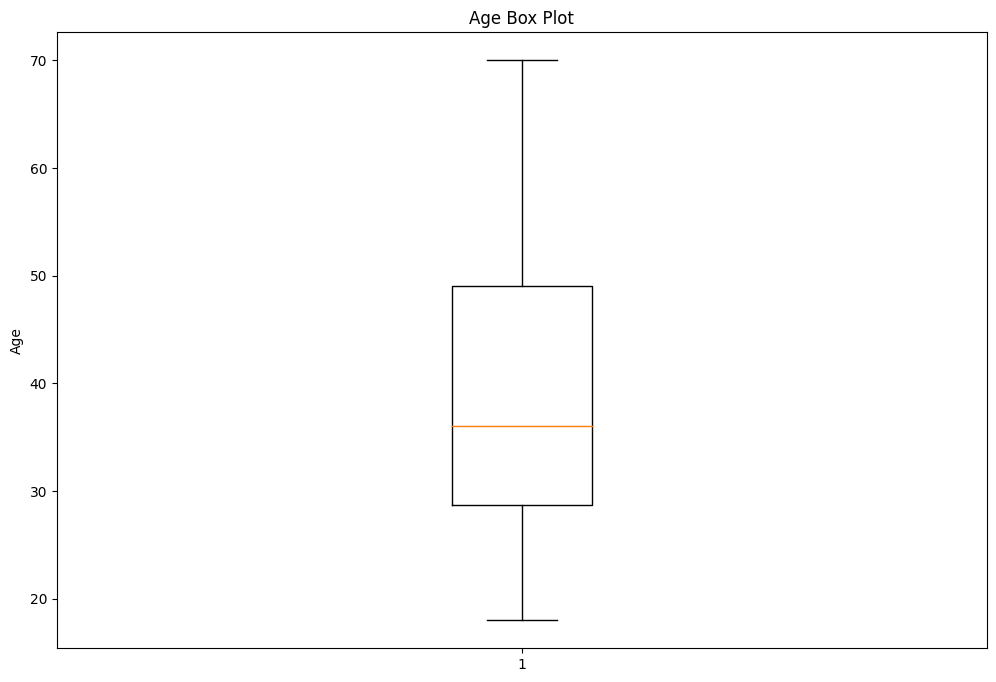

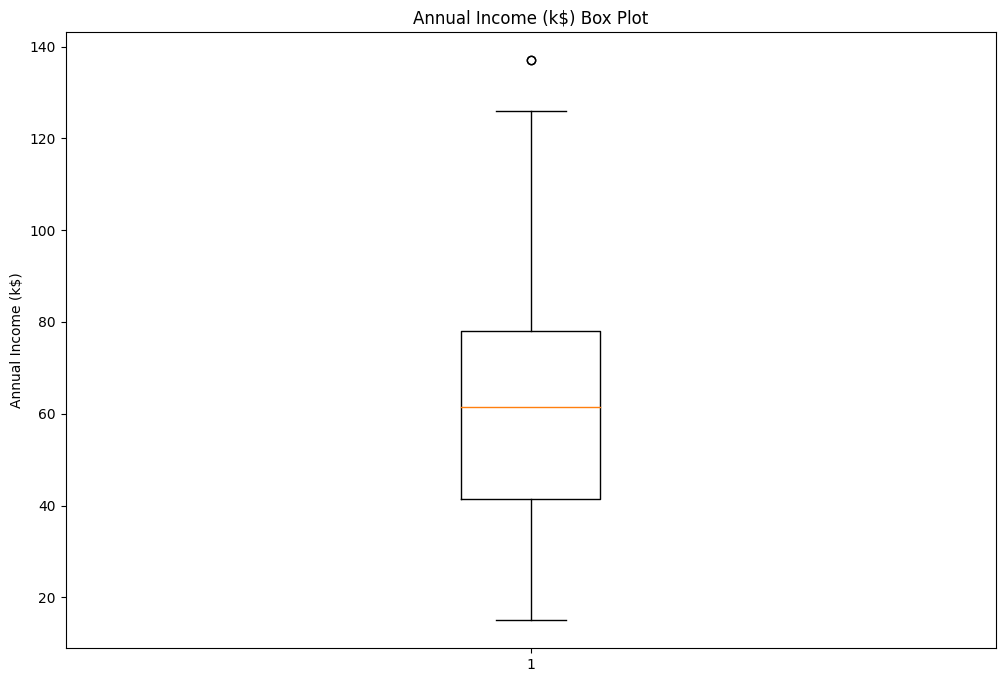

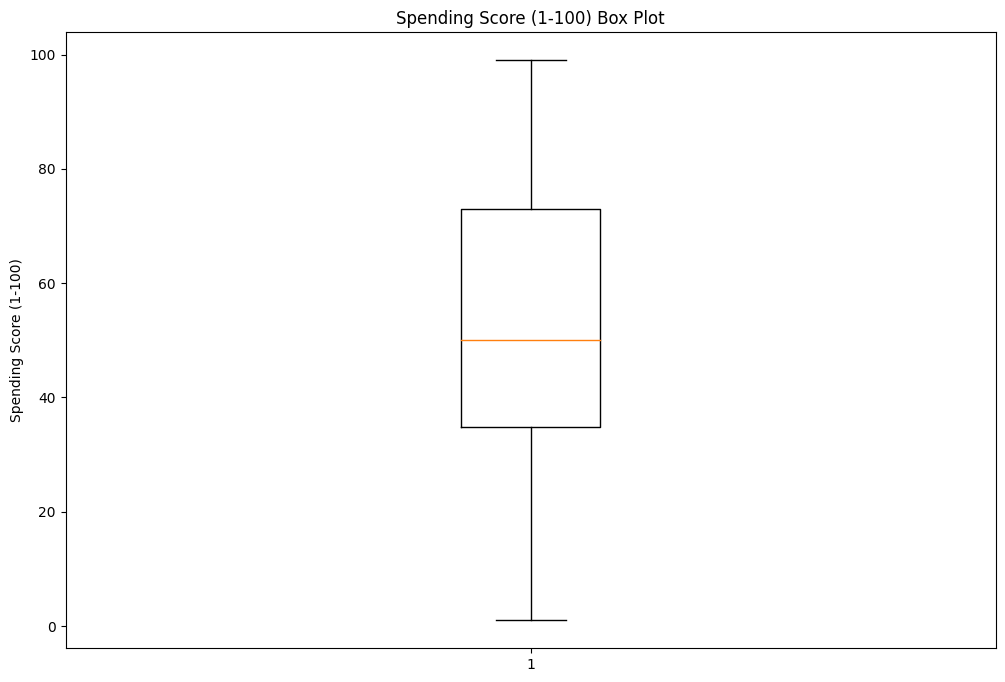

Histograms for Numerical Features:


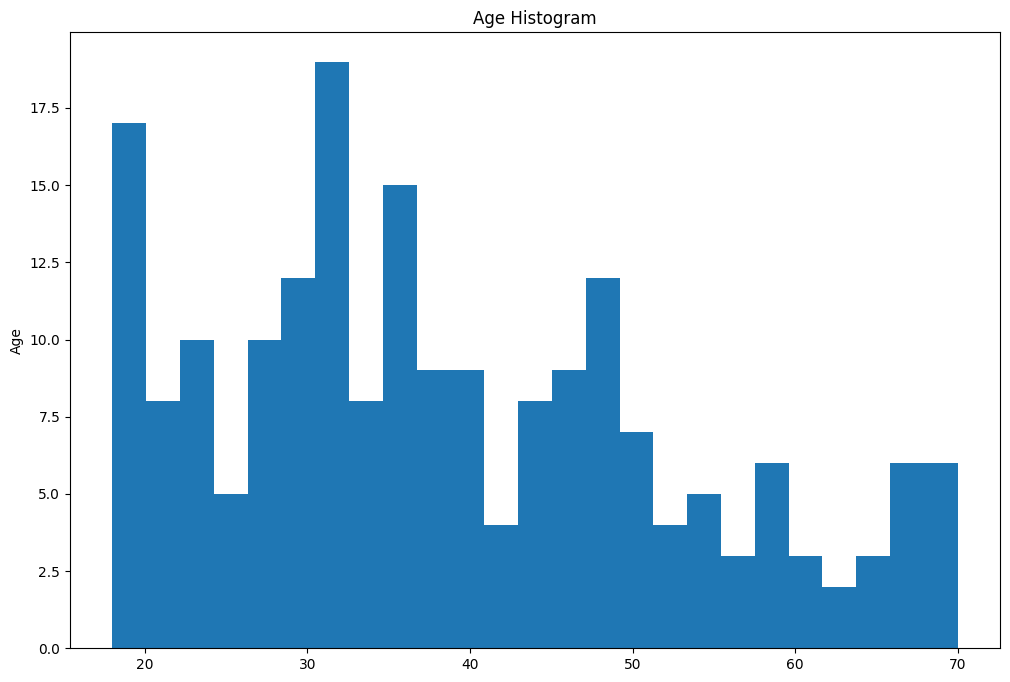

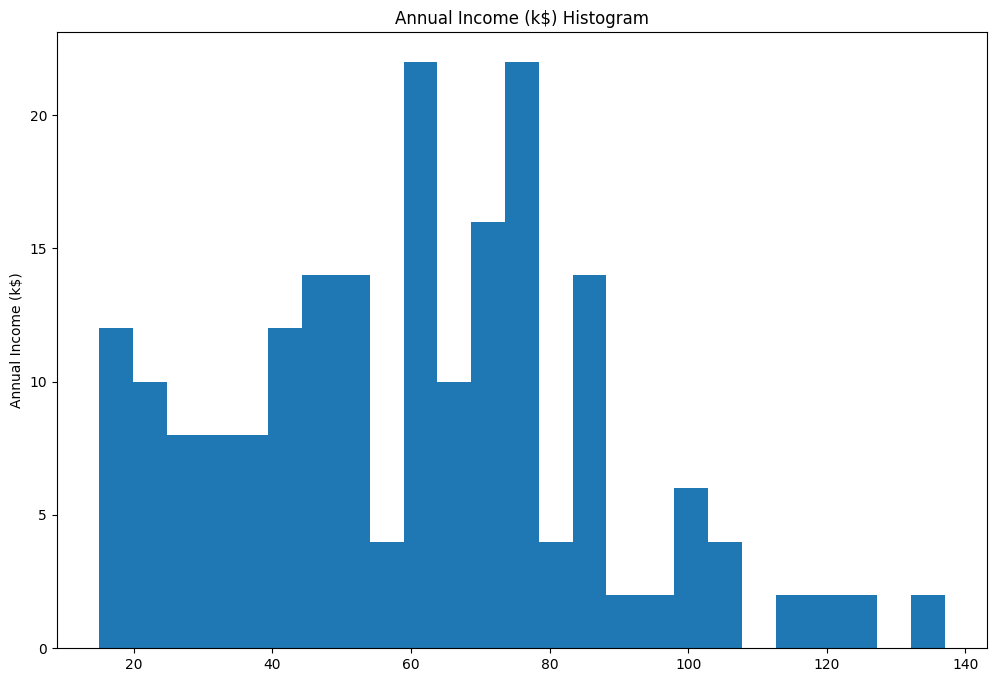

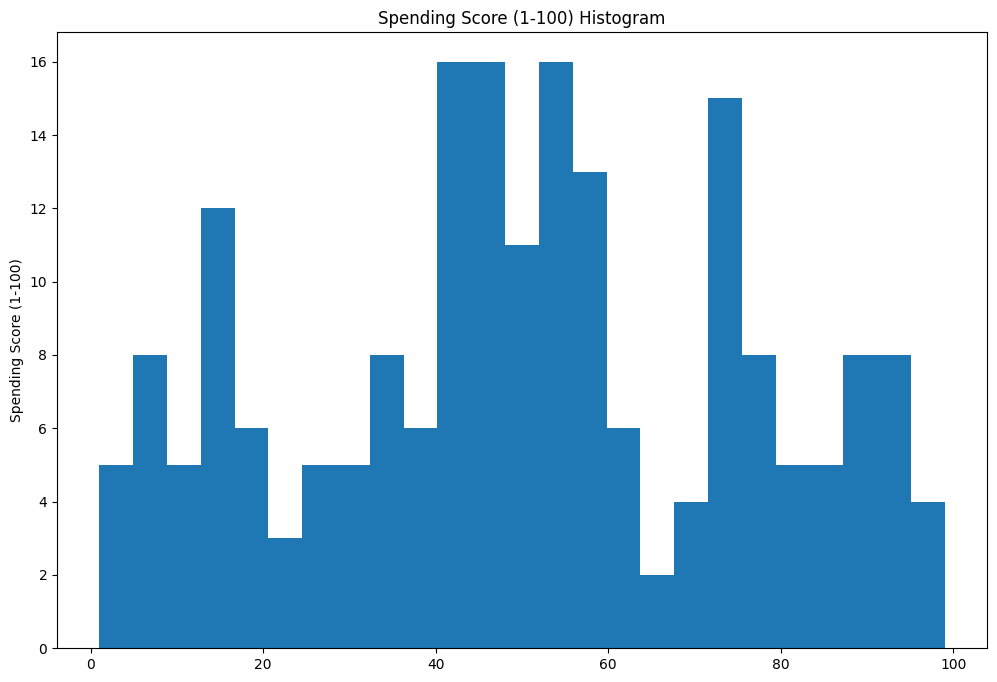

Bar Charts for Categorical Features:


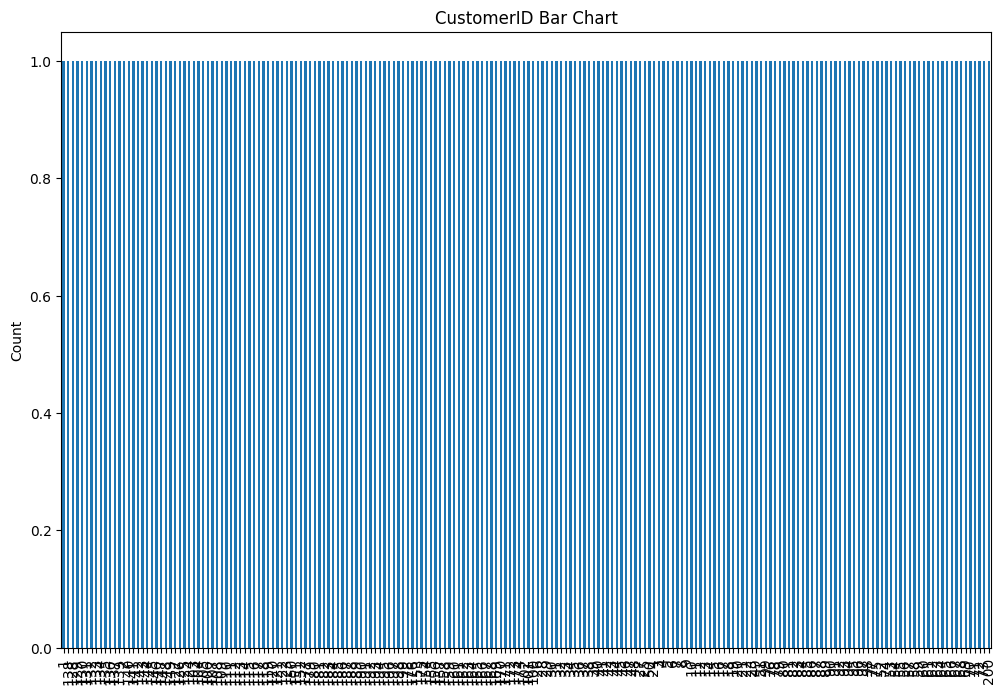

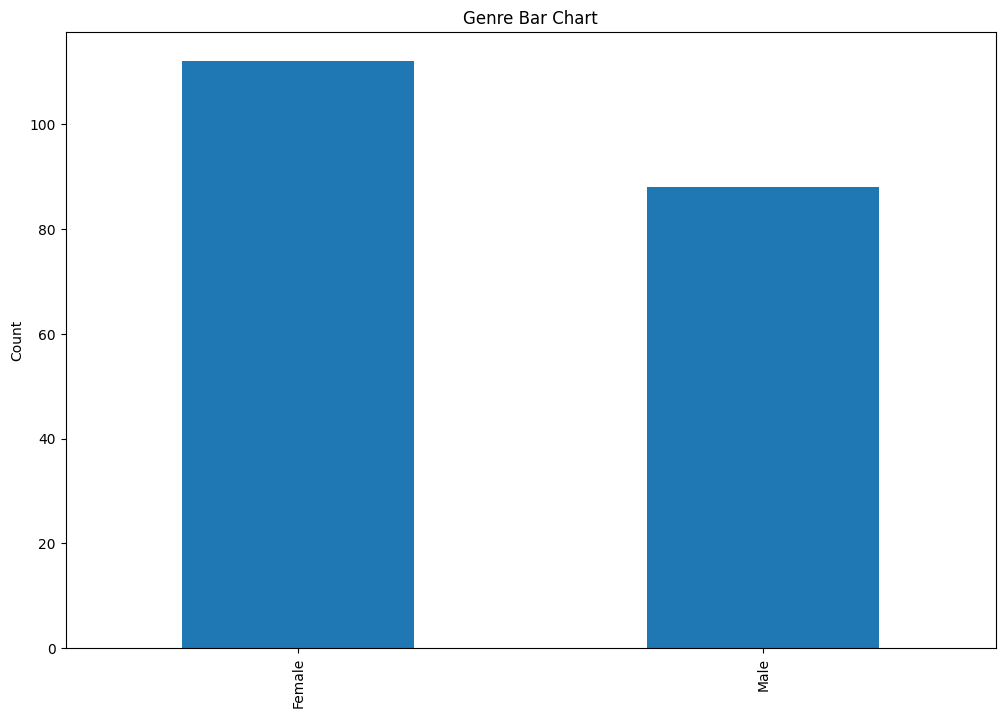

In [ ]:
#Function that outputs univariate visualizations depending on the feature's data type
def main():
    
    #box plots for numerical features
    def box_plots():
        for col in numerical_vars:
            fig, ax = plt.subplots(figsize=(12, 8))
            ax.boxplot(customers[col])
            ax.set_ylabel(col)
            ax.set_title(col + " Box Plot")
            plt.show()
    
    #histograms for numerical features
    def hist():
        for col in numerical_vars:
            fig, ax = plt.subplots(figsize=(12, 8))
            ax.hist(customers[col], bins=25)
            ax.set_ylabel(col)
            ax.set_title(col + " Histogram")
            plt.show()
                
    #bar chart for categorical features
    def bar_charts():
        for col in categorical_vars:
            fig, ax = plt.subplots(figsize=(12, 8))
            customers[col].value_counts().plot(kind='bar', ax=ax)
            ax.set_ylabel('Count')
            ax.set_title(col + " Bar Chart")
            plt.show()
                
    print("Box Plots for Numerical Features:")
    box_plots()
    
    print("Histograms for Numerical Features:")
    hist()
    
    print("Bar Charts for Categorical Features:")
    bar_charts()

main()

In [ ]:
#Checking for outliers in numerical variables
for col in numerical_vars:
    Q1 = customers[col].quantile(0.25)
    Q3 = customers[col].quantile(0.75)
    IQR = Q3 - Q1
  
    outliers = customers[(customers[col] < Q1 - 1.5*IQR) | (customers[col] > Q3 + 1.5*IQR)]

    print(col + ': ' + str(len(outliers)))

Age: 0
Annual Income (k$): 2
Spending Score (1-100): 0


In [ ]:
#Checking skewness of numeric variables
print(customers[numerical_vars].skew())

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64


In [ ]:
#Checking kurtosis of numeric variables
print(customers[numerical_vars].kurtosis())

Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64


Age vs. Annual Income (k$)


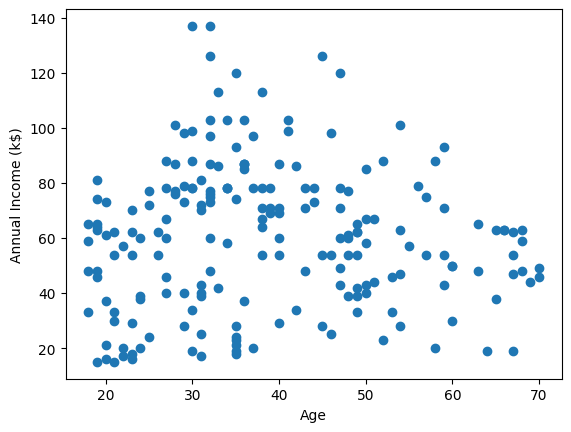


Age vs. Spending Score (1-100)


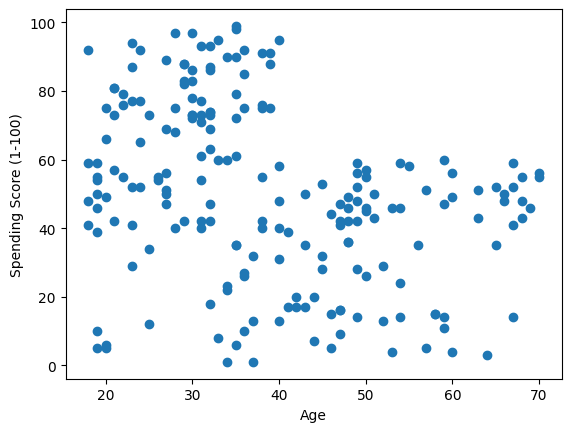


Annual Income (k$) vs. Age


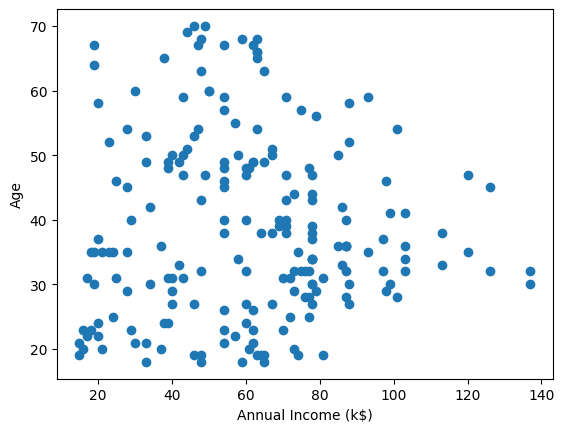


Annual Income (k$) vs. Spending Score (1-100)


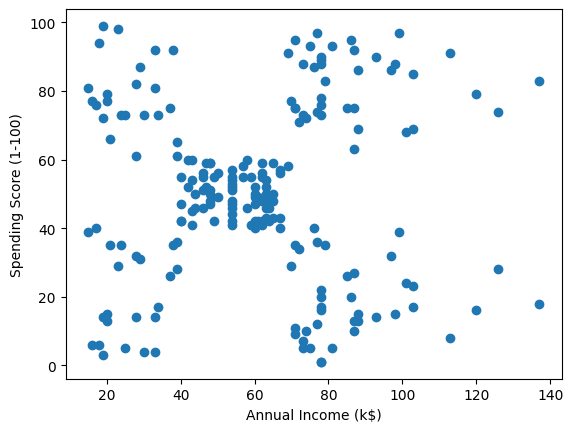


Spending Score (1-100) vs. Age


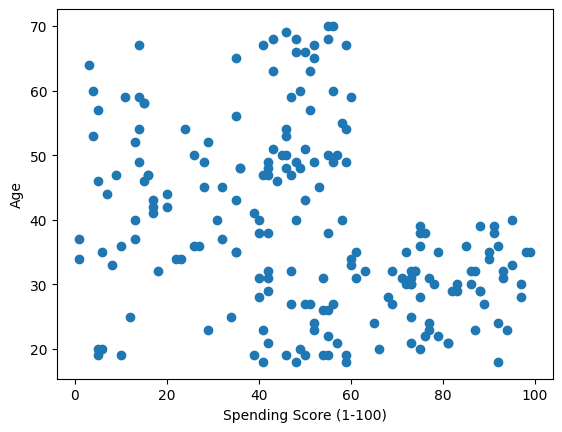


Spending Score (1-100) vs. Annual Income (k$)


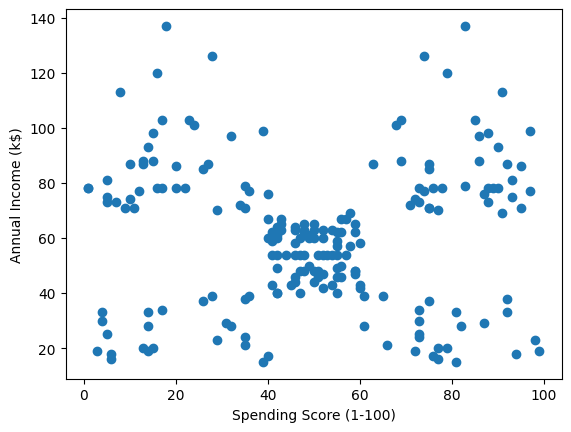

In [ ]:
#Scatter plots to visualize the relationships between all numeric columns
for col_a in numerical_vars:
    for col_b in numerical_vars:
        if col_a != col_b:
            print(col_a, 'vs.', col_b)
            plt.scatter(customers[col_a], customers[col_b])
            plt.xlabel(col_a)
            plt.ylabel(col_b)
            plt.show()
            print()

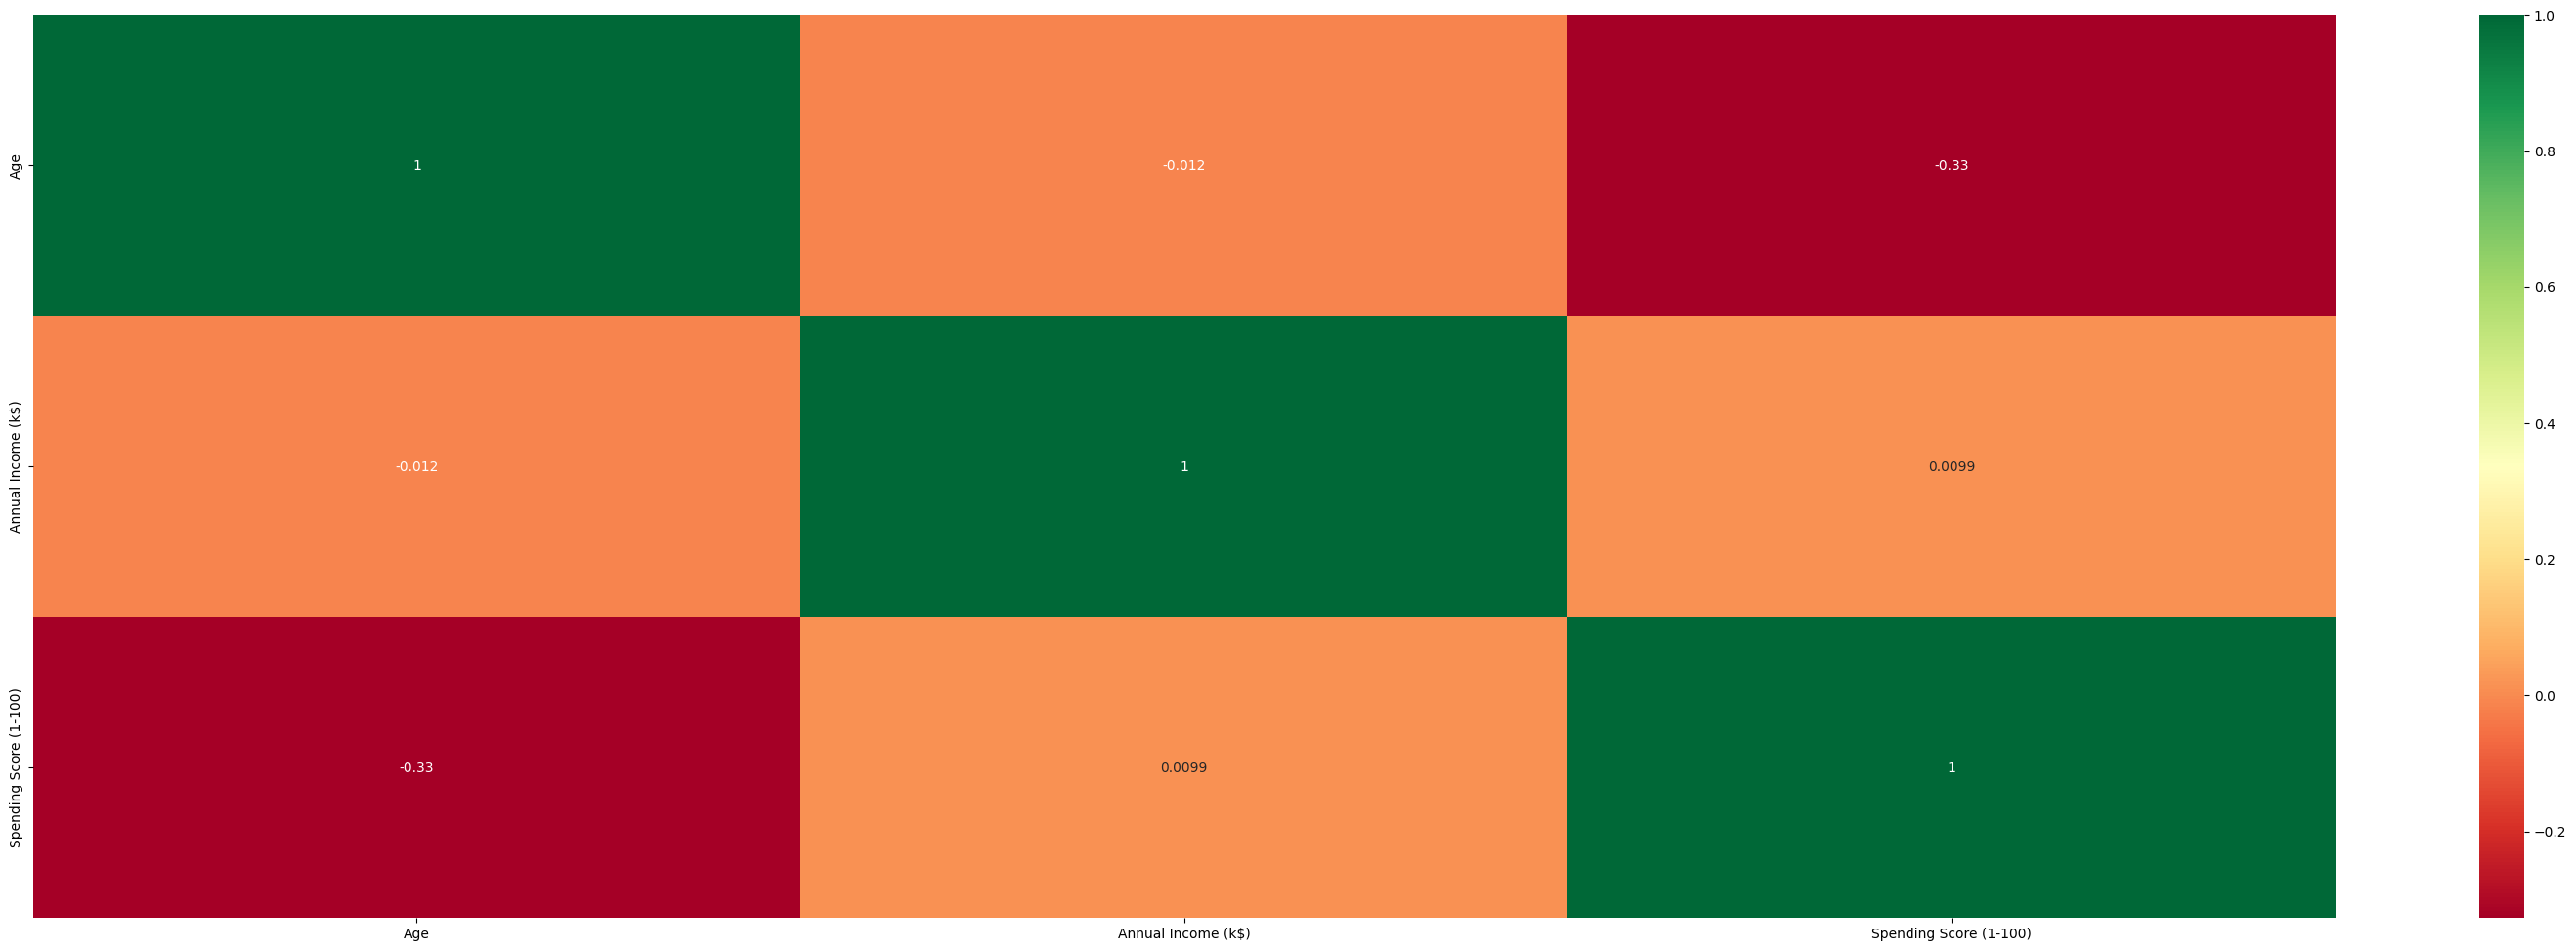

In [ ]:
#Heatmap to visualize the correlation between multiple columns
plt.figure(figsize=(38, 12))
sns.heatmap(customers.corr(), cmap='RdYlGn', annot=True)
plt.show()

###**Data Preparation**

In [ ]:
#Feature scaling using StandardScaler (to scale the 'Annual Income (k$)' and 'Spending Score (1-100)') and creating new data frame with the
#scaled features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(customers[['Annual Income (k$)', 'Spending Score (1-100)']])
scaled_df = pd.DataFrame(scaled_df, columns=['Annual Income', 'Spending Score'])
scaled_df.head()

,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


###**K-Means Clustering**

In [ ]:
#Selecting only the 'Annual Income' and 'Spending Score' columns from the scaled_df DataFrame, and creating new data frame X with only the
#scaled features that will be used for clustering. It is necessary because KMeans clustering requires numerical data and cannot handle categorical data.
X = scaled_df[['Annual Income', 'Spending Score']]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

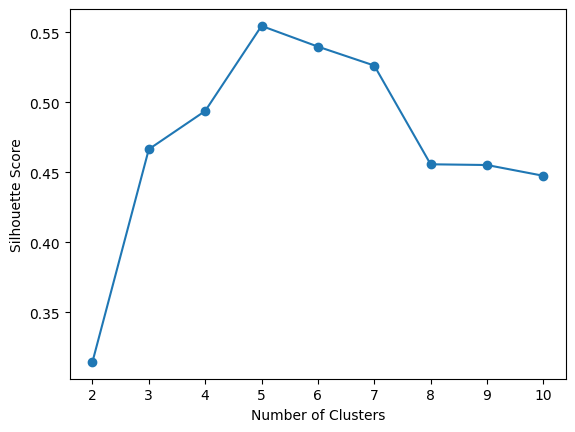

In [ ]:
#Determining the optimal number of clusters using the Silhouette Method (The Silhouette Coefficient is a measure of how similar an object is
#to its own cluster compared to other clusters, and ranges from -1 to 1, with higher values indicating better clustering.)
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

#Visually determining the optimal number of clusters based on the highest Silhouette Coefficient
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
#Training the KMeans model with the optimal number of clusters that was determined in the previous step
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Obtaining the cluster assignments for each data point
labels = kmeans.labels_

**Visualizing and Analyzing the Clusters**

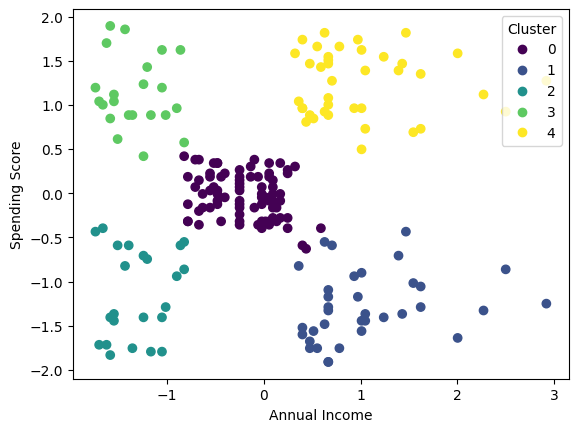

In [ ]:
#Creating a scatter plot of the selected features (Annual Income and Spending Score), colored by cluster assignment - legends shows which color
#corresponds to which cluster
colors = ['red', 'blue', 'green', 'orange', 'purple']
cluster_labels = list(set(labels))
scatter = plt.scatter(X['Annual Income'], X['Spending Score'], c=labels, cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(handles=scatter.legend_elements()[0], labels=cluster_labels, title="Cluster", loc='upper right')
plt.show()

**Initial cluster analysis:** There are 5 different clusters each represented by a different color. 

Cluster 0 has an annual income slightly below or around average, clusters 2 and 3 have annual incomes below average, and clusters 1 and 4 have incomes above average. In terms of spending score, cluster 0 is again around average, but the clusters that are below spending score average are cluster 1 and 2, while clusters 3 and 4 have spending scores above average.

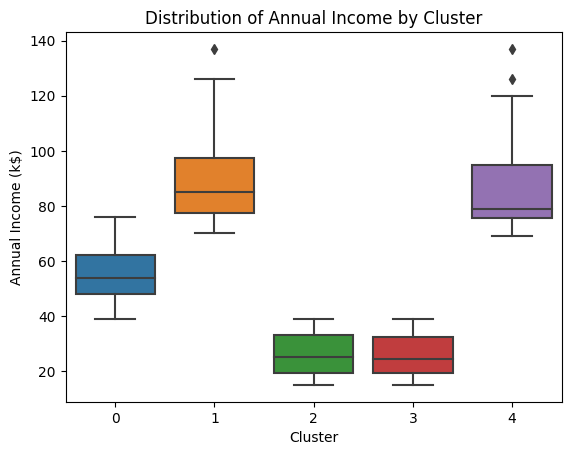

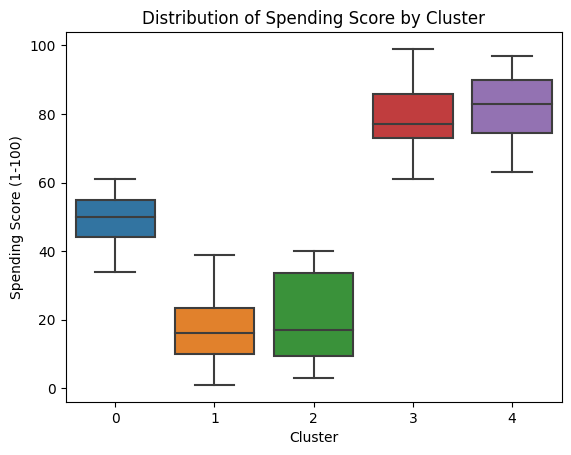

In [15]:
#Additional analysis of the clusters:

#Creating a data frame with the original data and the cluster assignments
cluster_df = customers.copy()
cluster_df['Cluster'] = labels

#Computing the mean values of each feature for each cluster
cluster_means = cluster_df.groupby('Cluster').mean()

#Visualizing the distribution of each feature for each cluster using box plots
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=cluster_df)
plt.title('Distribution of Annual Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')
plt.show()

sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=cluster_df)
plt.title('Distribution of Spending Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')
plt.show()

###Description of each cluster:

* **Cluster 0: Medium income, medium spending**

This cluster represents customers who have a medium income and spend moderately in the mall. These customers have an annual income around the overall average and may be price-sensitive or may prioritize savings over spending.

* **Cluster 1: High income, low spending**

This cluster represents customers who have a high income but do not spend much in the mall. These customers may prefer to spend their money on other things or may be more focused on saving for the future.

* **Cluster 2: Low income, low spending**

This cluster represents customers who have a low income and do not spend much in the mall. These customers may be more price-sensitive or may only buy what they need rather than what they want.

* **Cluster 3: Low income, high spending**

This cluster represents customers who have a low income but spend a lot in the mall. These customers may be willing to spend more than they can afford in order to maintain a certain lifestyle or to enjoy the shopping experience.

* **Cluster 4: High income, high spending**

This cluster represents customers who have a high income and spend a lot in the mall. These customers are likely to be the mall's target customers, who prefer high-end and luxurious products and services.

##**REPORT**

**a. Dataset Description:**

The Mall Customers dataset contains information about customers who visit a shopping mall. The dataset has 5 columns which include CustomerID, Gender, Age, Annual Income (in thousands of dollars), and Spending Score (a score assigned by the mall based on customer behavior and spending nature, ranging from 1 to 100 where higher scores indicate higher spending). There are no missing values in the dataset and the data types of each column are appropriate.

**b. Data Preprocessing, Feature Selection, and Scaling:**

First, I loaded the dataset and dropped any missing values. I then performed feature scaling using the StandardScaler from scikit-learn to scale the annual income and spending score features. Next, I selected the appropriate features for clustering, which were Annual Income and Spending Score. Finally, I created a new data frame with only the selected features.

**c. Determining the Optimal Number of Clusters:**

To determine the optimal number of clusters, I used the Silhouette Method and plotted the silhouette scores for different numbers of clusters. I selected the number of clusters with the highest silhouette score, which was 5.

**d. Cluster Analysis:**

We used KMeans clustering with 5 clusters to group the customers based on their Annual Income and Spending Score. The 5 clusters are:
* Cluster 0: Medium income, medium spending
* Cluster 1: High income, low spending
* Cluster 2: Low income, low spending
* Cluster 3: Low income, high spending
* Cluster 4: High income, high spending

Customers from cluster 0 have medium income and medium spending score. These customers may be price-sensitive or may prioritize savings over spending. Cluster 1 Customers are characterized by high income and low spending score and these customers may prefer to spend their money on other things or may be more focused on saving for the future. Customers from cluster 2 have low income and low spending and they may be more price-sensitive or may only buy what they need rather than what they want. Customers from cluster 3 have Llow income but high spending and it suggests that they may be willing to spend more than they can afford in order to maintain a certain lifestyle or to enjoy the shopping experience. Lastly, customers from cluster 4 have high income and high spending and these customers are likely to be the mall's target customers, who prefer high-end and luxurious products and services.

**e. Insights and Recommendations:**

The results of our analysis can be used to segment the customers into different groups based on their spending behavior and income. This can help the mall to develop marketing strategies that are tailored to the needs and preferences of each group.

The reccomendations for each cluster are as following:

* Cluster 0: offer discounts on high-end products to incentivize spending and develop loyalty programs.
* Cluster 1: conduct customer research and offer personalized services and experiences.
* Cluster 2: offer more affordable products and provide discounts or promotions.
* Cluster 3: provide financing options and discounts on complementary products.
* Cluster 4: offer exclusive products and personalized services to enhance the high-end shopping experience.

Overall, the mall can use this analysis to improve customer satisfaction, increase sales, and boost profitability.